# i) Breaking Brackets

Every year during March Madness, millions of people fill out brackets hoping to be the one person who picks every game right. It sounds simple, just choose winners for 67 games, but in reality, no one has done it in the past 10 years. Statisticians say the odds of a perfect bracket are around 1 in 9.2 quintillion.

The reason? Upsets. Those unexpected wins by lower-seeded teams are what ruin most brackets, they’re what we mean when we say a team “broke the bracket.”

For this project, I looked at the past decade of March Madness to see if there are any patterns in those upsets. When do they happen? How often? Is there anything we can learn to give us a better shot at making smarter picks next year?


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [63]:
seed_df = pd.read_csv('Upset_Seed_Info.csv')
count_df = pd.read_csv('Upset_Count.csv')
heat_df = pd.read_csv('Heat_Check_Ratings.csv')

In [64]:
seed_df.head()

,YEAR,CURRENT ROUND,SEED WON,SEED LOST,SEED DIFF
0,2024,64,11,6,5
1,2024,64,10,7,3
2,2024,64,14,3,11
3,2024,64,11,6,5
4,2024,64,12,5,7


In [65]:
count_df.head()

,YEAR,FIRST ROUND,SECOND ROUND,SWEET 16,ELITE 8,FINAL 4,TOTAL
0,2024,8,1,4,1,0,14
1,2023,5,4,3,2,0,14
2,2022,7,5,4,0,1,17
3,2021,9,6,2,1,0,18
4,2019,8,0,1,2,0,11


In [68]:
heat_df.head()

,YEAR,TEAM NO,TEAM,SEED,ROUND,EASY DRAW,TOUGH DRAW,DARK HORSE,UPSET ALERT,CINDERELLA
0,2024,1067,Connecticut,1,0,True,False,False,False,False
1,2024,1073,BYU,6,0,True,False,False,False,False
2,2024,1015,Washington St.,7,0,True,False,False,False,False
3,2024,1055,Howard,16,0,True,False,False,False,False
4,2024,1039,New Mexico,11,0,True,False,False,False,False


# ii) Main Figure (1 of 2)

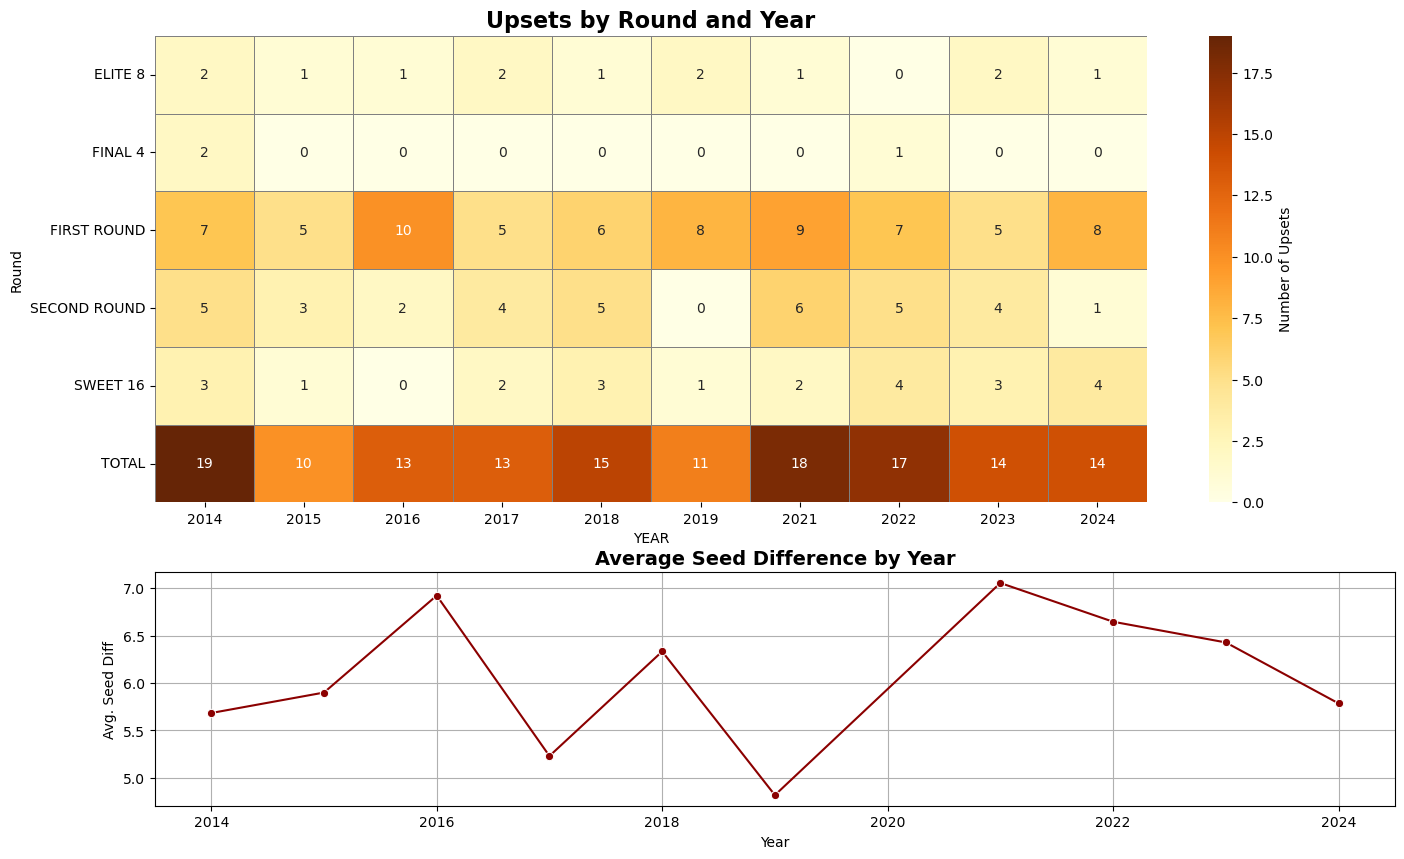

In [71]:
## NOTE NO TOURNAMENT OCCURED IN 2020 DUE TO COVID SO NO DATA
count_year = count_df[count_df["YEAR"].between(2014, 2024)]
seed_year = seed_df[seed_df["YEAR"].between(2014, 2024)]
heat_year = heat_df[heat_df["YEAR"].between(2014, 2024)]

#melt data
upsets = count_year.melt(id_vars=['YEAR'], var_name='ROUND_LABEL', value_name='UPSET_COUNT')

#heatmap cells
heatmap = upsets.pivot(index="ROUND_LABEL", columns="YEAR", values="UPSET_COUNT")

#year and seed avg diff
year_diff = seed_year.groupby('YEAR', as_index=False)['SEED DIFF'].mean()
year_diff.rename(columns={'SEED DIFF': 'AVG_SEED_DIFF'}, inplace=True)

#set up figure
fig = plt.figure(figsize=(16, 10))
layout = GridSpec(2, 1, height_ratios=[2, 1])


#heatmap
ax1 = plt.subplot(layout[0])
sns.heatmap(
    heatmap,
    annot=True,
    fmt=".0f",
    cmap="YlOrBr",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Number of Upsets'},
)
ax1.set_title("Upsets by Round and Year", fontsize=16, weight='bold')
ax1.set_ylabel("Round")

#lineplot
ax2 = plt.subplot(layout[1])
sns.lineplot(
    data=year_diff,
    x="YEAR",
    y="AVG_SEED_DIFF",
    marker="o",
    color="darkred"
)
ax2.set_title("Average Seed Difference by Year", fontsize=14, weight='bold')
ax2.set_ylabel("Avg. Seed Diff")
ax2.set_xlabel("Year")
ax2.grid(True)

# ii) Main Figure (2 of 2)

Text(0, 0.5, 'Number of Upsets')

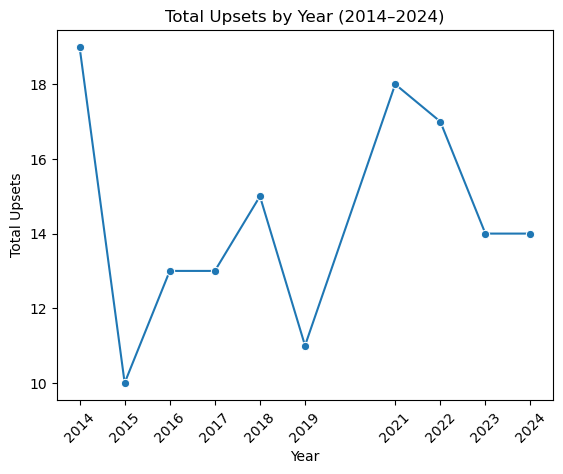

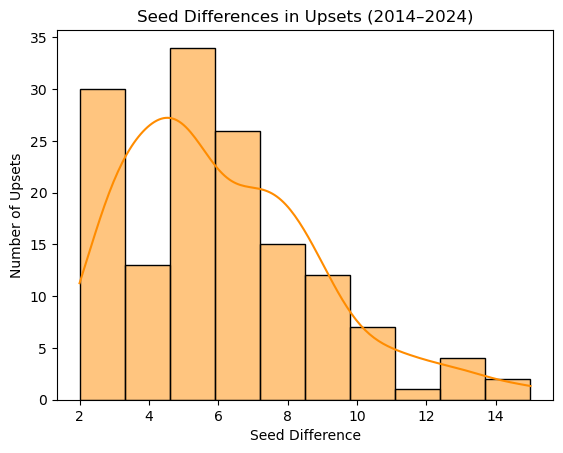

In [73]:
#line chart
fig2b, ax2b = plt.subplots()
sns.lineplot(data=count_year, x="YEAR", y="TOTAL", marker="o", ax=ax2b)
ax2b.set_title("Total Upsets by Year (2014–2024)")
ax2b.set_ylabel("Total Upsets")
ax2b.set_xlabel("Year")
ax2b.set_xticks(count_year["YEAR"])
plt.xticks(rotation=45)

#histogram
fig3b, ax3b = plt.subplots()
sns.histplot(seed_year["SEED DIFF"], bins=10, kde=True, ax=ax3b, color="darkorange")
ax3b.set_title("Seed Differences in Upsets (2014–2024)")
ax3b.set_xlabel("Seed Difference")
ax3b.set_ylabel("Number of Upsets")

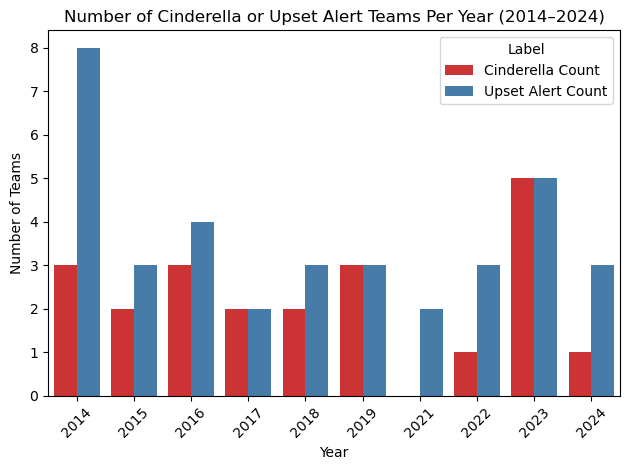

In [74]:
#seperate column data
cinderella = heat_year[heat_year["CINDERELLA"] == True].copy()
alert = heat_year[heat_year["UPSET ALERT"] == True].copy()

#number of teams
cind_year = cinderella.groupby("YEAR").size().reset_index(name="Cinderella Count")
upset_year = alert.groupby("YEAR").size().reset_index(name="Upset Alert Count")

#single df
tags_year = pd.merge(cind_year, upset_year, on="YEAR", how="outer").fillna(0)

#melt df
tags_melt = tags_year.melt(id_vars="YEAR", var_name="Label", value_name="Count")

#bar chart
fig, ax = plt.subplots()
sns.barplot(data=tags_melt, x="YEAR", y="Count", hue="Label", palette="Set1", ax=ax)
ax.set_title("Number of Cinderella or Upset Alert Teams Per Year (2014–2024)")
ax.set_ylabel("Number of Teams")
ax.set_xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Upsets by Winning Seed (2014–2024)')

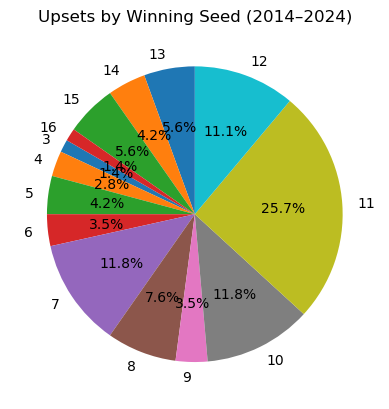

In [76]:
#upset per seed
seed_upset = seed_year["SEED WON"].value_counts().sort_index()

#pie chart
fig, ax = plt.subplots()
ax.pie(seed_upset, labels=seed_upset.index, autopct='%1.1f%%', startangle=150)
ax.set_title("Upsets by Winning Seed (2014–2024)")

# iii) Legend

## **Heatmap**
### Purpose
- Display the total number of upsets by round and year
### Axes:
- X: Years 2014-2024
- Y: Tournament Rounds
### Colors:
- Lighter shade = less upsets
- Darker shade = more upsets
### Annotations
- Display the number of upsets in each round per year


## **Line Chart**
### Purpose
- To visualize annual trends in the overall number of upsets
### Axes:
- X: Year of Tournament (2014-2024)
- Y: # of upsets that year
### Markers:
- Help identify certain years (such as 2021)

## **Histogram**
### Purpose
- To analyze how frequently different seed differences lead to upsets
### Axes:
- X: Seed difference between seeds
- Y: # of upsets that occured with that seed difference
### KDE Curve:
- Shows the density and distribution of the data

## **Bar Chart**
### Purpose
- To compare the yearly count of Cinderella teams and those flagged as possible upsets.
- For a better understanding, a Cinderella team is a team that has the possibility of exceeding expectations as a lower seed.
### Axes:
- X: Years 2014-2024
- Y: Number of teams in each category
### Colors:
- Red: Cinderella Count
- Blue: Upset Count
### Grouping
- Allows side by side comparisons

## **Pie Chart**
### Purpose
- To break down what seeds most often win upsets
### Slices:
- Represent different winning seed numbers
### Size
- Corresponds to the proportion
### Labels
- Shows exact percentage

# iv) Findings
- **Early Chaos:** The first round tends to host the most upsets every year, meaning the chaos starts early.
- **Larger Seed Gaps:** Upsets with larger seed difficulties (over 10 seeds apart) tend to happen in the first round or Sweet 16
- **Bracket Buster:** 2014 had the most overall upsets, with the deeper distributions happening in the later rounds.
- **Spiked:** The average seed difference spiked in 2022, suggesting more unexpected wins occured.
- **Cycles of Chaos:** The average seed different tends to spike every 2-3 years, suggesting the tournament goes through cycles of stability.
- **Later is Safer:** Final Four Upsets are extremely rare, but when they happen (2022) it is usually not suprising.
- **Dangerous Seeds:** Seeds 10,11, and 12 win hold a large number of total upsets, as seen in the pie chart.
- **Cinderella Story:** Certain years have a high number of "Cinderella Stories", showing that this chaos comes in waves.
- **Upset Alert:** Teams named "Upset Alert" often align with the Cinderella outcomes, suggesting predictive power in tagging.

# v) Data and Method
## Data
- Upset_Seed_Info: Contains the year, round, seed of winner/loser, and seed difference for each upset. 
- Upset_Count: Summarized the count of upsets by round and year.
- Heat_Check_Ranking: Used to track patters in team behavior with tags such as "Cinderella Story" or "Upset Alert".
## Method
### Data Cleaning and Manipulation (Pandas)
- Loaded in the data sets
- Filtered all data to 2014-2024
- Cleaned column names and standardized round labels
- Reshaped Data
- Collected stats like average seed difference, total upsets per year, upset counts per round, and Cinderella or Upset Alert teams
### Stat Visualization (matplotlib and seaborn)
**Heatmap**
- Created a color coded grid.
- Annotated cells to make them easy to read.

**Line Chart**
- Plots total upsets each year to show patterns.
  
**Histogram and KDE**
- Highlight common differences by seed for upsets.

**Bar Chart**
- Compare Cinderella and Upset Alert across years.

**Pie Chart**
- Visualize the distribution of winning seeds across all upsets.  

# vi) Significance Statement
March Madness is known for its unpredictiveness, but the numbers often get lost in the chaos. This visualization allows for the number to be brought to light, showing **WHEN** and **HOW** shocking they really were. By inegrating statistical analysis with data visualizations, we bridge data with fandom, making NCAA upsets not just a 'Bracket Buster' but a memorable and visual aspect of tournament history.